In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.patches as mpatches
from scipy.stats import norm
%matplotlib inline

In [2]:
def Gaussian(data):
    mu, std = norm.fit(data)
    
    xmin = np.min(data)
    xmax = np.max(data)
    
    x = np.linspace(xmin, xmax, 100)
    p = norm.pdf(x, mu, std)
    return p

In [21]:
df_G_O = pd.read_csv(r'Channel/G_O_Channel.txt', sep='\t', header = None)
df_P_O = pd.read_csv(r'Channel/P_O_Channel.txt', sep='\t', header = None)

df_G_U = pd.read_csv(r'Channel/G_U_Channel.txt', sep='\t', header = None)
df_P_U = pd.read_csv(r'Channel/P_U_Channel.txt', sep='\t', header = None)

df_G_S = pd.read_csv(r'Channel/G_S_Channel.txt', sep='\t', header = None)
df_P_S = pd.read_csv(r'Channel/P_S_Channel.txt', sep='\t', header = None)

In [22]:
df_G_S.rename(columns = lambda s: s+1, index = lambda s: s+1)
#The rows and columns represent the steps (billiards setups of chaotic ensemble) and the open channels, respectively.

,1,2,3,4,5,6,7,8,9,10
1,0.821579,2.51753,2.37994,5.03515,4.94946,6.47849,7.56849,7.84157,9.50440,10.8654
2,0.757984,2.69951,3.47071,4.19192,5.14201,6.40270,7.11825,8.32030,9.31892,10.5146
3,1.163310,2.51856,3.08943,4.71552,5.28908,6.05361,7.04815,8.42604,9.58620,9.9479
4,1.959160,2.74001,3.20622,4.14655,4.88013,6.32517,7.17281,8.88465,9.14363,10.2212
5,1.665380,1.93812,3.98073,4.04700,4.81411,6.49410,7.21842,8.17001,9.10678,10.6305
...,...,...,...,...,...,...,...,...,...,...
99996,1.754020,2.77727,2.87052,4.59329,5.54793,6.18882,6.98490,7.86922,8.66267,10.7643
99997,1.566950,2.26183,2.44696,4.01571,4.80466,6.39242,7.53972,8.09313,9.63933,10.6192
99998,1.912440,3.48528,3.75236,4.39084,5.02443,6.73131,7.36488,8.37054,9.13952,10.3584
99999,0.303910,2.27985,3.50063,4.83326,5.09918,6.31025,6.96106,8.31015,9.70559,9.9645


In [23]:
G_O = df_G_O.values
P_O = df_P_O.values

G_U = df_G_U.values
P_U = df_P_U.values

G_S = (df_G_S.values)/2
P_S = (df_P_S.values)/2

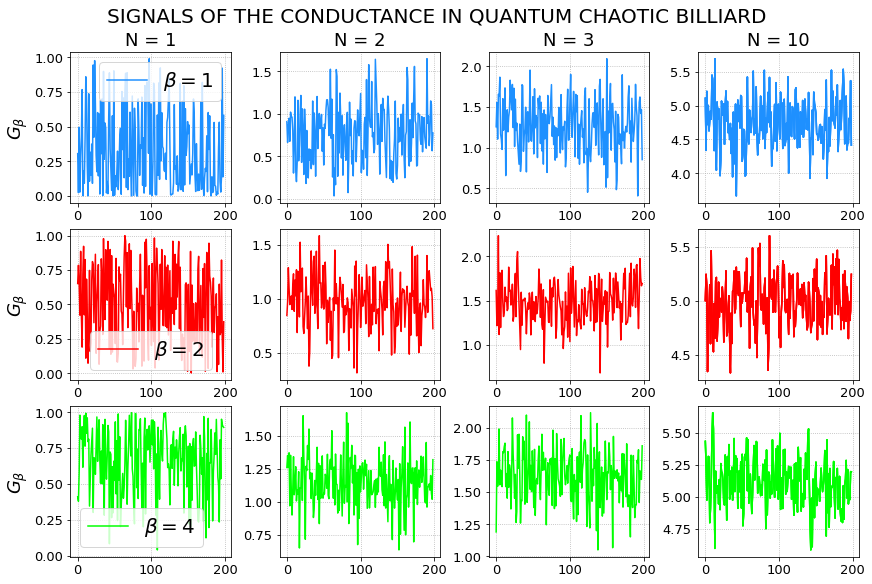

In [24]:
fig, axs = plt.subplots(3,4, figsize = (12,8), constrained_layout = True, facecolor = 'w')

fig.suptitle(r'SIGNALS OF THE CONDUCTANCE IN QUANTUM CHAOTIC BILLIARD', fontsize = 20)

for j in range(0,4):
    for i in range(0,3):
        
        axs[i,j].tick_params(axis='both', which = 'major', labelsize = 13)
        
        if (j == 3):
            
            axs[0,3].set_title('N = 10', fontsize = 18) 
            
            axs[0,3].plot(G_O[0:199,9], color='dodgerblue', label = r'$\beta = 1$', alpha=1);
            axs[1,3].plot(G_U[0:199,9], color='red', label = r'$\beta = 2$', alpha=1);
            axs[2,3].plot(G_S[0:199,9], color='lime', label = r'$\beta = 4$', alpha=1);
            
        else:
            axs[0,j].set_title('N = '+ str(j+1), fontsize = 18)
            if (i == 0):
                axs[i,j].plot(G_O[0:199,j], color='dodgerblue', label = r'$\beta = 1$', alpha=1);
            else:
                if (i == 1):
                    axs[i,j].plot(G_U[0:199,j], color='red', label = r'$\beta = 2$', alpha=1);
                else:
                    if (i == 2):
                        axs[i,j].plot(G_S[0:199,j], color='lime', label = r'$\beta = 4$', alpha=1);
        
        if (j == 0):
            axs[i,0].set_ylabel(r'$G_{\beta}$', fontsize = 18)
            axs[i,0].legend(fontsize = 20)
            
        axs[i,j].grid(linestyle=':')


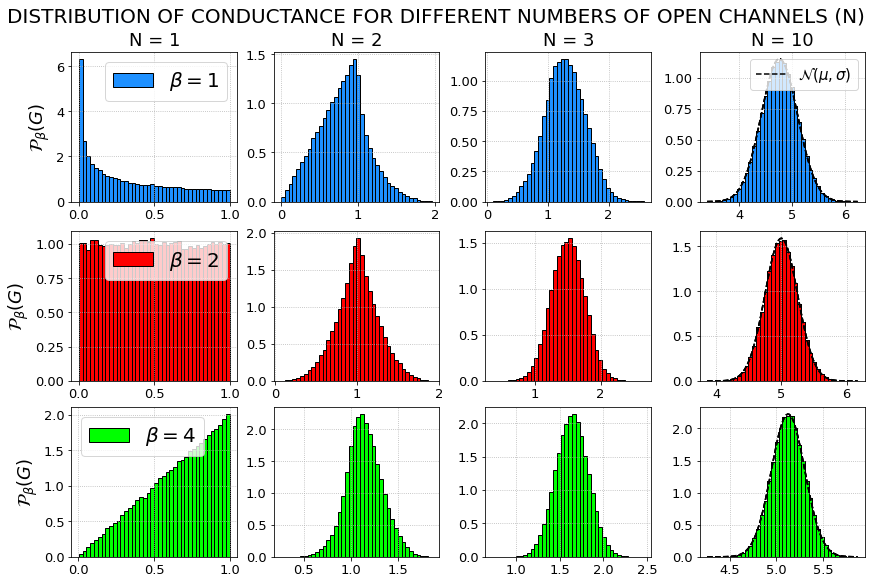

In [25]:
steps = 50

fig, axs = plt.subplots(3,4, figsize = (12,8), constrained_layout = True, facecolor = 'w')

fig.suptitle(r'DISTRIBUTION OF CONDUCTANCE FOR DIFFERENT NUMBERS OF OPEN CHANNELS (N)', fontsize = 20)

for j in range(0,4):
    for i in range(0,3):
        
        axs[i,j].tick_params(axis='both', which = 'major', labelsize = 13)
        
        if (j == 3):
            
            axs[0,3].set_title('N = 10', fontsize = 18) 
            
            axs[0,3].hist(G_O[:,9], bins = 40, color='dodgerblue', alpha=1, density = True, histtype='bar', ec='black');
            axs[1,3].hist(G_U[:,9], bins = 40, color='red', alpha=1, density = True, histtype='bar', ec='black');
            axs[2,3].hist(G_S[:,9], bins = 40, color='lime', alpha=1, density = True, histtype='bar', ec='black');

            x = np.linspace(np.min(G_O[:,9]), np.max(G_O[:,9]), 100)
            axs[0,3].plot(x,Gaussian(G_O[:,9]), color = 'black', label = r'$\mathcal{N}(\mu,\sigma)$', alpha = 1, linewidth = 1.5, linestyle = 'dashed')
            
            x = np.linspace(np.min(G_U[:,9]), np.max(G_U[:,9]), 100)
            axs[1,3].plot(x,Gaussian(G_U[:,9]), color = 'black', alpha = 1, linewidth = 1.5, linestyle = 'dashed')

            x = np.linspace(np.min(G_S[:,9]), np.max(G_S[:,9]), 100)
            axs[2,3].plot(x,Gaussian(G_S[:,9]), color = 'black', alpha = 1, linewidth = 1.5, linestyle = 'dashed')

            
        else:
            axs[0,j].set_title('N = '+ str(j+1), fontsize = 18)
            if (i == 0):
                axs[i,j].hist(G_O[:,j], bins = 40, color='dodgerblue', label = r'$\beta = 1$', alpha=1, density = True, histtype='bar', ec='black');
            else:
                if (i == 1):
                    axs[i,j].hist(G_U[:,j], bins = 40, color='red', label = r'$\beta = 2$', alpha=1, density = True, histtype='bar', ec='black');
                else:
                    if (i == 2):
                        axs[i,j].hist(G_S[:,j], bins = 40, color='lime', label = r'$\beta = 4$', alpha=1, density = True, histtype='bar', ec='black');
        
        if (j == 0):
            axs[i,0].set_ylabel(r'$\mathcal{P}_{\beta}(G)$', fontsize = 18)
            axs[i,0].legend(fontsize = 20)
        
        if (j == 3 and i == 0):
            axs[0,3].legend(fontsize = 15)
        
        axs[i,j].grid(linestyle=':')

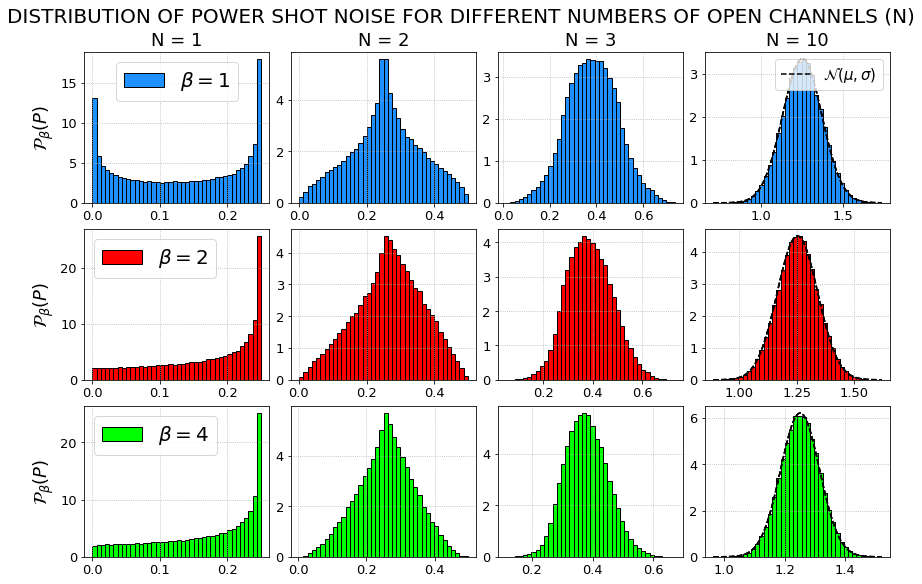

In [26]:
fig, axs = plt.subplots(3,4, figsize = (12,8), constrained_layout = True, facecolor = 'w')

fig.suptitle(r'DISTRIBUTION OF POWER SHOT NOISE FOR DIFFERENT NUMBERS OF OPEN CHANNELS (N)', fontsize = 20)

for j in range(0,4):
    for i in range(0,3):
        
        axs[i,j].tick_params(axis='both', which = 'major', labelsize = 13)
        
        if (j == 3):
            
            axs[0,3].set_title('N = 10', fontsize = 18) 
            
            axs[0,3].hist(P_O[:,9], bins = 40, color='dodgerblue', alpha=1, density = True, histtype='bar', ec='black');
            axs[1,3].hist(P_U[:,9], bins = 40, color='red', alpha=1, density = True, histtype='bar', ec='black');
            axs[2,3].hist(P_S[:,9], bins = 40, color='lime', alpha=1, density = True, histtype='bar', ec='black');
            
            x = np.linspace(np.min(P_O[:,9]), np.max(P_O[:,9]), 100)
            axs[0,3].plot(x,Gaussian(P_O[:,9]), color = 'black', label = r'$\mathcal{N}(\mu,\sigma)$', alpha = 1, linewidth = 1.5, linestyle = 'dashed')
            
            x = np.linspace(np.min(P_U[:,9]), np.max(P_U[:,9]), 100)
            axs[1,3].plot(x,Gaussian(P_U[:,9]), color = 'black', alpha = 1, linewidth = 1.5, linestyle = 'dashed')

            x = np.linspace(np.min(P_S[:,9]), np.max(P_S[:,9]), 100)
            axs[2,3].plot(x,Gaussian(P_S[:,9]), color = 'black', alpha = 1, linewidth = 1.5, linestyle = 'dashed')
            
        else:
            axs[0,j].set_title('N = '+ str(j+1), fontsize = 18)
            if (i == 0):
                axs[i,j].hist(P_O[:,j], bins = 40, color='dodgerblue', label = r'$\beta = 1$', alpha=1, density = True, histtype='bar', ec='black');
            else:
                if (i == 1):
                    axs[i,j].hist(P_U[:,j], bins = 40, color='red', label = r'$\beta = 2$', alpha=1, density = True, histtype='bar', ec='black');
                else:
                    if (i == 2):
                        axs[i,j].hist(P_S[:,j], bins = 40, color='lime', label = r'$\beta = 4$', alpha=1, density = True, histtype='bar', ec='black');
        
        if (j == 0):
            axs[i,0].set_ylabel(r'$\mathcal{P}_{\beta}(P)$', fontsize = 18)
            axs[i,0].legend(fontsize = 20)
            
        if (j == 3 and i == 0):
            axs[0,3].legend(fontsize = 15, loc = "upper right")
        
        axs[i,j].grid(linestyle=':')

In [27]:
meanG_O = np.mean(G_O, axis = 0)
meanG_U = np.mean(G_U, axis = 0)
meanG_S = np.mean(G_S, axis = 0)

varG_O = np.var(G_O, axis = 0)
varG_U = np.var(G_U, axis = 0)
varG_S = np.var(G_S, axis = 0)

meanP_O = np.mean(P_O, axis = 0)
meanP_U = np.mean(P_U, axis = 0)
meanP_S = np.mean(P_S, axis = 0)

varP_O = np.var(P_O, axis = 0)
varP_U = np.var(P_U, axis = 0)
varP_S = np.var(P_S, axis = 0)

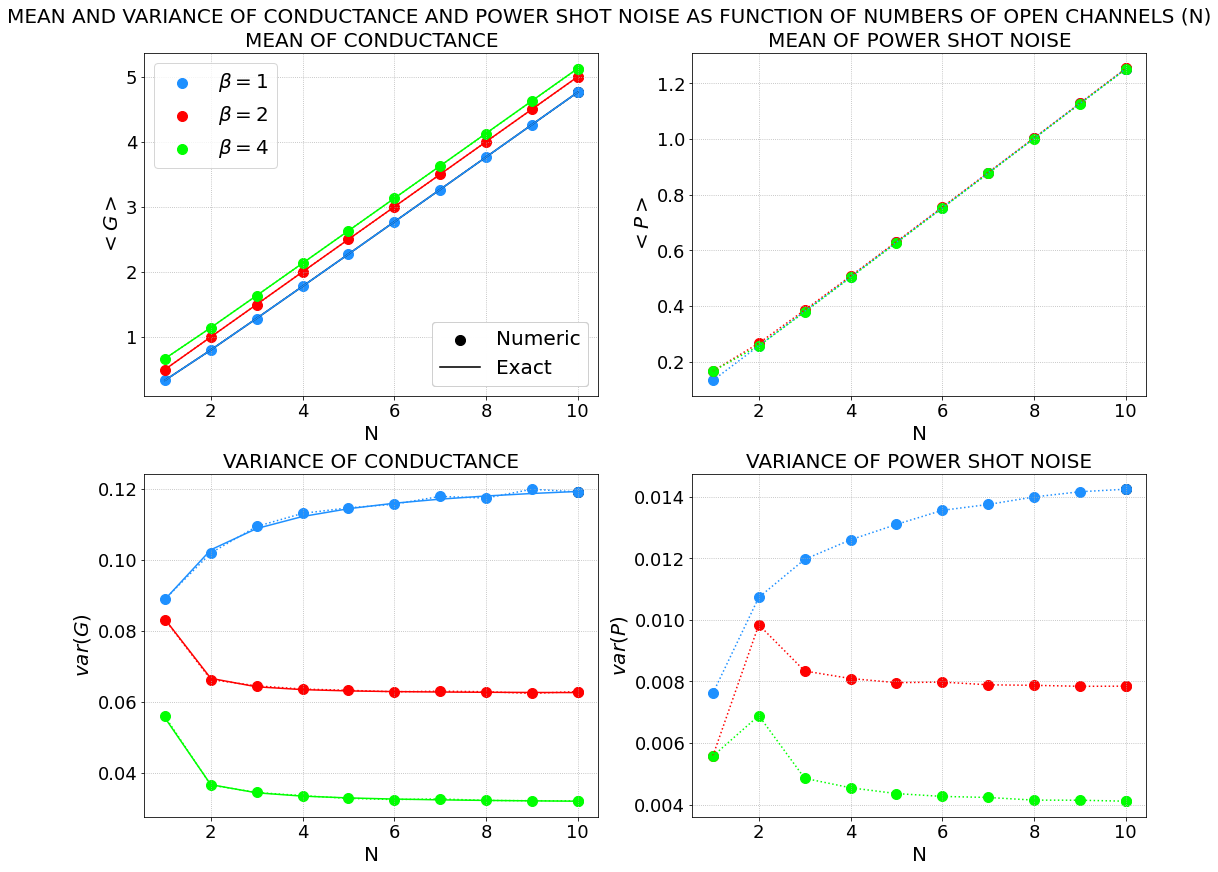

In [28]:
N1 = [i for i in range(1,11)]
N2 = N1
NT = N1+N2

meanG_O_aux = np.empty(10, dtype = float)
meanG_U_aux = np.empty(10, dtype = float)
meanG_S_aux = np.empty(10, dtype = float)

varG_O_aux = np.empty(10, dtype = float)
varG_U_aux = np.empty(10, dtype = float)
varG_S_aux = np.empty(10, dtype = float)

for N1 in range(1,11):
    
    N2 = N1
    NT = N1 + N2

    meanG_O_aux[N1-1] = (N1*N2)/(NT-1+(2/1))
    meanG_U_aux[N1-1] = (N1*N2)/(NT-1+(2/2))
    meanG_S_aux[N1-1] = (N1*N2)/(NT-1+(2/4))
    
    varG_O_aux[N1-1] = 2*N1*N2*(N1-1+2)*(N2-1+2)/((NT-1+4)*(NT-2+2)*((NT-1+2)**2))
    varG_U_aux[N1-1] = 2*N1*N2*(N1-1+1)*(N2-1+1)/(2*(NT-1+2)*(NT-2+1)*((NT-1+1)**2))
    varG_S_aux[N1-1] = 2*N1*N2*(N1-1+(2/4))*(N2-1+(2/4))/(4*(NT-1+(4/4))*(NT-2+(2/4))*((NT-1+(2/4))**2))

fig, axs = plt.subplots(2,2, figsize = (15,12), constrained_layout = True)

fig.suptitle(r'MEAN AND VARIANCE OF CONDUCTANCE AND POWER SHOT NOISE AS FUNCTION OF NUMBERS OF OPEN CHANNELS (N)', fontsize = 20)

for i in range(0,2):
    for j in range(0,2):
        
        if (i == 0) and (j == 0):
            axs[0,0].set_title('MEAN OF CONDUCTANCE', fontsize = 20)
            axs[0,0].set_ylabel(r'$<G>$', fontsize = 20)
            
            variable_O = meanG_O; variable_U = meanG_U; variable_S = meanG_S
            
        else:
            if (i == 1) and (j == 0):
  
                axs[1,0].set_title('VARIANCE OF CONDUCTANCE', fontsize = 20)
                axs[1,0].set_ylabel(r'$var(G)$', fontsize = 20)
            
                variable_O = varG_O; variable_U = varG_U; variable_S = varG_S
            
            else:
                if (i == 0) and (j == 1):
                    
                    axs[0,1].set_title('MEAN OF POWER SHOT NOISE', fontsize = 20)
                    axs[0,1].set_ylabel(r'$<P>$', fontsize = 20)
                    
                    variable_O = meanP_O; variable_U = meanP_U; variable_S = meanP_S
                    
                else:
                    if (i == 1) and (j == 1):
                        axs[1,1].set_title('VARIANCE OF POWER SHOT NOISE', fontsize = 20)
                        axs[1,1].set_ylabel(r'$var(P)$', fontsize = 20)

                        variable_O = varP_O; variable_U = varP_U; variable_S = varP_S 
        
        
        for k in range(0,len(meanG_O)):
            axs[i,j].scatter((k+1), variable_O[k], s = 100, color = 'dodgerblue', alpha = 1)
            axs[i,j].scatter((k+1), variable_U[k], s = 100, color = 'red', alpha = 1)
            axs[i,j].scatter((k+1), variable_S[k], s = 100, color = 'lime', alpha = 1)
            
            if k == (len(meanG_O)-1):
                Numeric_scatter = axs[i,j].scatter((k+1), variable_O[k], label = 'Numeric', s = 100, color = 'black', alpha = 1)
                beta_1 = axs[i,j].scatter((k+1), variable_O[k], label = r'$\beta = 1$', s = 100, color = 'dodgerblue', alpha = 1)
                beta_2 = axs[i,j].scatter((k+1), variable_U[k], label = r'$\beta = 2$', s = 100, color = 'red', alpha = 1)
                beta_4 = axs[i,j].scatter((k+1), variable_S[k], label = r'$\beta = 4$', s = 100, color = 'lime', alpha = 1)

        axs[i,j].plot([i for i in range(1,11)], variable_O, color = 'dodgerblue', linestyle = ':')
        axs[i,j].plot([i for i in range(1,11)], variable_U, color = 'red', linestyle = ':')
        axs[i,j].plot([i for i in range(1,11)], variable_S, color = 'lime', linestyle = ':')
        
        if (i == 0 and j == 0):
            Exact_plot, = axs[0,0].plot([i for i in range(1,11)], meanG_O_aux, label = 'Exact', color = 'black', linestyle = '-')
            axs[0,0].plot([i for i in range(1,11)], meanG_O_aux, color = 'dodgerblue', linestyle = '-')
            axs[0,0].plot([i for i in range(1,11)], meanG_U_aux, color = 'red', linestyle = '-')
            axs[0,0].plot([i for i in range(1,11)], meanG_S_aux, color = 'lime', linestyle = '-')
        
        if (i == 1 and j == 0):
            axs[1,0].plot([i for i in range(1,11)], varG_O_aux , color = 'dodgerblue', linestyle = '-')
            axs[1,0].plot([i for i in range(1,11)], varG_U_aux, color = 'red', linestyle = '-')
            axs[1,0].plot([i for i in range(1,11)], varG_S_aux, color = 'lime', linestyle = '-')

        axs[i,j].grid(linestyle=':')
        first_legend = axs[0,0].legend([Numeric_scatter, Exact_plot], ["Numeric","Exact"], loc = "lower right", fontsize = 20)
        axs[0,0].add_artist(first_legend)
        axs[0,0].legend([beta_1, beta_2, beta_4], [r'$\beta = 1$', r'$\beta = 2$', r'$\beta = 4$'], loc = "upper left", fontsize = 20)

        axs[i,j].set_xlabel('N', fontsize = 20)
        axs[i,j].tick_params(axis = 'both', which = 'major', labelsize = 18)
        

In [29]:
df_G_O_Gamma_N1 = pd.read_csv(r'Gamma/G_O_Gamma_N1.txt', sep='\t', header = None)
df_G_U_Gamma_N1 = pd.read_csv(r'Gamma/G_U_Gamma_N1.txt', sep='\t', header = None)
df_G_S_Gamma_N1 = pd.read_csv(r'Gamma/G_S_Gamma_N1.txt', sep='\t', header = None)

df_G_O_Gamma_N2 = pd.read_csv(r'Gamma/G_O_Gamma_N2.txt', sep='\t', header = None)
df_G_U_Gamma_N2 = pd.read_csv(r'Gamma/G_U_Gamma_N2.txt', sep='\t', header = None)
df_G_S_Gamma_N2 = pd.read_csv(r'Gamma/G_S_Gamma_N2.txt', sep='\t', header = None)

df_G_O_Gamma_N3 = pd.read_csv(r'Gamma/G_O_Gamma_N3.txt', sep='\t', header = None)
df_G_U_Gamma_N3 = pd.read_csv(r'Gamma/G_U_Gamma_N3.txt', sep='\t', header = None)
df_G_S_Gamma_N3 = pd.read_csv(r'Gamma/G_S_Gamma_N3.txt', sep='\t', header = None)

df_G_O_Gamma_N10 = pd.read_csv(r'Gamma/G_O_Gamma_N10.txt', sep='\t', header = None)
df_G_U_Gamma_N10 = pd.read_csv(r'Gamma/G_U_Gamma_N10.txt', sep='\t', header = None)
df_G_S_Gamma_N10 = pd.read_csv(r'Gamma/G_S_Gamma_N10.txt', sep='\t', header = None)

G_O_Gamma_N1 = df_G_O_Gamma_N1.values
G_U_Gamma_N1 = df_G_U_Gamma_N1.values
G_S_Gamma_N1 = (df_G_S_Gamma_N1.values)/2

G_O_Gamma_N2 = df_G_O_Gamma_N2.values
G_U_Gamma_N2 = df_G_U_Gamma_N2.values
G_S_Gamma_N2 = (df_G_S_Gamma_N2.values)/2

G_O_Gamma_N3 = df_G_O_Gamma_N3.values
G_U_Gamma_N3 = df_G_U_Gamma_N3.values
G_S_Gamma_N3 = (df_G_S_Gamma_N3.values)/2

G_O_Gamma_N10 = df_G_O_Gamma_N10.values
G_U_Gamma_N10 = df_G_U_Gamma_N10.values
G_S_Gamma_N10 = (df_G_S_Gamma_N10.values)/2


In [30]:
df_G_O_Gamma_N1

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,3.261500e-10,0.000021,0.000525,0.016818,0.000008,0.032226,0.356553,0.012176,0.059747,0.416522,...,0.316507,0.002266,0.003115,0.487781,0.013288,0.363645,0.184854,0.568332,0.084646,0.644910
1,1.436920e-09,0.012241,0.001495,0.001519,0.012309,0.007709,0.032009,0.058036,0.069109,0.185469,...,0.002113,0.606588,0.538501,0.363438,0.287957,0.587812,0.915792,0.398656,0.346464,0.070426
2,1.315360e-09,0.000006,0.037784,0.000925,0.003026,0.000570,0.987992,0.369619,0.034743,0.063733,...,0.587035,0.673814,0.103308,0.022822,0.756873,0.376466,0.179037,0.531499,0.268258,0.209078
3,2.449810e-09,0.000007,0.004957,0.000589,0.016928,0.000796,0.036022,0.023649,0.025021,0.071707,...,0.008266,0.107988,0.303964,0.060587,0.064184,0.609846,0.378070,0.037090,0.161326,0.752239
4,2.982840e-09,0.000345,0.005821,0.001829,0.006081,0.006597,0.001255,0.172644,0.023499,0.001924,...,0.007843,0.015428,0.069726,0.192808,0.022782,0.248111,0.009336,0.119040,0.313404,0.909707
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,3.022570e-09,0.003774,0.000079,0.024570,0.016662,0.004122,0.018973,0.009785,0.019081,0.881946,...,0.874428,0.039087,0.192654,0.274281,0.650835,0.616794,0.112802,0.036704,0.000422,0.104517
99996,1.055450e-09,0.000508,0.000635,0.273939,0.002975,0.040425,0.000407,0.006432,0.064092,0.005130,...,0.899320,0.437647,0.010917,0.064858,0.155144,0.005448,0.024046,0.074168,0.370810,0.458471
99997,1.872590e-10,0.001727,0.010206,0.016987,0.002249,0.001581,0.002090,0.072701,0.013964,0.958098,...,0.068692,0.051825,0.252486,0.382472,0.088692,0.713919,0.169115,0.113560,0.177508,0.183825
99998,3.059640e-11,0.000088,0.000851,0.000190,0.000071,0.000077,0.014860,0.100037,0.247732,0.062670,...,0.098503,0.340476,0.319657,0.009416,0.736811,0.942648,0.004374,0.051738,0.797839,0.326321


In [31]:
meanG_O_1 = np.mean(G_O_Gamma_N1, axis = 0)
meanG_U_1 = np.mean(G_U_Gamma_N1, axis = 0)
meanG_S_1 = np.mean(G_S_Gamma_N1, axis = 0)

meanG_O_2 = np.mean(G_O_Gamma_N2, axis = 0)
meanG_U_2 = np.mean(G_U_Gamma_N2, axis = 0)
meanG_S_2 = np.mean(G_S_Gamma_N2, axis = 0)

meanG_O_3 = np.mean(G_O_Gamma_N3, axis = 0)
meanG_U_3 = np.mean(G_U_Gamma_N3, axis = 0)
meanG_S_3 = np.mean(G_S_Gamma_N3, axis = 0)

meanG_O_10 = np.mean(G_O_Gamma_N10, axis = 0)
meanG_U_10 = np.mean(G_U_Gamma_N10, axis = 0)
meanG_S_10 = np.mean(G_S_Gamma_N10, axis = 0)

In [ ]:
fig, axs = plt.subplots(2,2, figsize = (15,12), constrained_layout = True, facecolor = 'w')

fig.suptitle(r'MEAN OF CONDUCTANCE AS FUNCTION OF $\Gamma$ FOR DIFFERENT VALUES OF N', fontsize = 20)

N = 1

for i in range(0,2):
    for j in range(0,2):
        
        if (i == 0) and (j == 0):
            axs[0,0].set_title('N = 1', fontsize = 20)
            axs[0,0].set_ylabel(r'$<G>$', fontsize = 20)
            
            variable_O = meanG_O_1; variable_U = meanG_U_1; variable_S = meanG_S_1
            
        else:
            if (i == 1) and (j == 0):
  
                axs[1,0].set_title('N = 3', fontsize = 20)
                axs[1,0].set_ylabel(r'$<G>$', fontsize = 20)
            
                variable_O = meanG_O_3; variable_U = meanG_U_3; variable_S = meanG_S_3
            
            else:
                if (i == 0) and (j == 1):
                    
                    axs[0,1].set_title('N = 2', fontsize = 20)
                    
                    variable_O = meanG_O_2; variable_U = meanG_U_2; variable_S = meanG_S_2
                    
                else:
                    if (i == 1) and (j == 1):
                        axs[1,1].set_title('N = 10', fontsize = 20)

                        variable_O = meanG_O_10; variable_U = meanG_U_10; variable_S = meanG_S_10 
        
        for k in range(0,len(meanG_O_1)):
            axs[i,j].scatter((k)/20, variable_O[k], s = 100, color = 'dodgerblue', alpha = 1)
            axs[i,j].scatter((k)/20, variable_U[k], s = 100, color = 'red', alpha = 1)
            axs[i,j].scatter((k)/20, variable_S[k], s = 100, color = 'lime', alpha = 1)
            
            if k == (len(meanG_O_1)-1):
                Numeric_scatter = axs[i,j].scatter((k)/20, variable_O[k], label = 'Numeric', s = 100, color = 'black', alpha = 1)
                beta_1 = axs[i,j].scatter((k)/20, variable_O[k], label = r'$\beta = 1$', s = 100, color = 'dodgerblue', alpha = 1)
                beta_2 = axs[i,j].scatter((k)/20, variable_U[k], label = r'$\beta = 2$', s = 100, color = 'red', alpha = 1)
                beta_4 = axs[i,j].scatter((k)/20, variable_S[k], label = r'$\beta = 4$', s = 100, color = 'lime', alpha = 1)

        axs[i,j].plot([i/20 for i in range(0,21)], variable_O, color = 'dodgerblue', linestyle = ':')
        axs[i,j].plot([i/20 for i in range(0,21)], variable_U, color = 'red', linestyle = ':')
        axs[i,j].plot([i/20 for i in range(0,21)], variable_S, color = 'lime', linestyle = ':')
        
        if (i == 1 and j == 1):
            N = 10
            Exact_plot, = axs[1,1].plot([i/20 for i in range(0,21)], [((N/2)+(1/4)*(1-2/1))*(i/20) for i in range(0,21)], label = 'Exact', color = 'black', linestyle = '-')
    
        axs[i,j].plot([i/20 for i in range(0,21)], [((N/2)+(1/4)*(1-2/1))*(i/20) for i in range(0,21)], color = 'dodgerblue')
        axs[i,j].plot([i/20 for i in range(0,21)], [((N/2)+(1/4)*(1-2/2))*(i/20) for i in range(0,21)], color = 'red')
        axs[i,j].plot([i/20 for i in range(0,21)], [((N/2)+(1/4)*(1-2/4))*(i/20) for i in range(0,21)], color = 'lime')
        
        axs[i,j].grid(linestyle=':')
        
        first_legend = axs[0,0].legend([Numeric_scatter, Exact_plot], ["Numeric","Exact"], loc = "lower right", fontsize = 20)
        axs[0,0].add_artist(first_legend)
        axs[0,0].legend([beta_1, beta_2, beta_4], [r'$\beta = 1$', r'$\beta = 2$', r'$\beta = 4$'], loc = "upper left", fontsize = 20)

        axs[i,j].set_xlabel(r'$\Gamma$', fontsize = 20)
        axs[i,j].tick_params(axis = 'both', which = 'major', labelsize = 18)
        N = N + 1

In [ ]:
df_P_O_Gamma_N1 = pd.read_csv(r'Gamma/P_O_Gamma_N1.txt', sep='\t', header = None)
df_P_U_Gamma_N1 = pd.read_csv(r'Gamma/P_U_Gamma_N1.txt', sep='\t', header = None)
df_P_S_Gamma_N1 = pd.read_csv(r'Gamma/P_S_Gamma_N1.txt', sep='\t', header = None)

df_P_O_Gamma_N2 = pd.read_csv(r'Gamma/P_O_Gamma_N2.txt', sep='\t', header = None)
df_P_U_Gamma_N2 = pd.read_csv(r'Gamma/P_U_Gamma_N2.txt', sep='\t', header = None)
df_P_S_Gamma_N2 = pd.read_csv(r'Gamma/P_S_Gamma_N2.txt', sep='\t', header = None)

df_P_O_Gamma_N3 = pd.read_csv(r'Gamma/P_O_Gamma_N3.txt', sep='\t', header = None)
df_P_U_Gamma_N3 = pd.read_csv(r'Gamma/P_U_Gamma_N3.txt', sep='\t', header = None)
df_P_S_Gamma_N3 = pd.read_csv(r'Gamma/P_S_Gamma_N3.txt', sep='\t', header = None)

df_P_O_Gamma_N10 = pd.read_csv(r'Gamma/P_O_Gamma_N10.txt', sep='\t', header = None)
df_P_U_Gamma_N10 = pd.read_csv(r'Gamma/P_U_Gamma_N10.txt', sep='\t', header = None)
df_P_S_Gamma_N10 = pd.read_csv(r'Gamma/P_S_Gamma_N10.txt', sep='\t', header = None)

P_O_Gamma_N1 = df_P_O_Gamma_N1.values
P_U_Gamma_N1 = df_P_U_Gamma_N1.values
P_S_Gamma_N1 = (df_P_S_Gamma_N1.values)/2

P_O_Gamma_N2 = df_P_O_Gamma_N2.values
P_U_Gamma_N2 = df_P_U_Gamma_N2.values
P_S_Gamma_N2 = (df_P_S_Gamma_N2.values)/2

P_O_Gamma_N3 = df_P_O_Gamma_N3.values
P_U_Gamma_N3 = df_P_U_Gamma_N3.values
P_S_Gamma_N3 = (df_P_S_Gamma_N3.values)/2

P_O_Gamma_N10 = df_P_O_Gamma_N10.values
P_U_Gamma_N10 = df_P_U_Gamma_N10.values
P_S_Gamma_N10 = (df_P_S_Gamma_N10.values)/2


In [17]:
meanP_O_1 = np.mean(P_O_Gamma_N1, axis = 0)
meanP_U_1 = np.mean(P_U_Gamma_N1, axis = 0)
meanP_S_1 = np.mean(P_S_Gamma_N1, axis = 0)

meanP_O_2 = np.mean(P_O_Gamma_N2, axis = 0)
meanP_U_2 = np.mean(P_U_Gamma_N2, axis = 0)
meanP_S_2 = np.mean(P_S_Gamma_N2, axis = 0)

meanP_O_3 = np.mean(P_O_Gamma_N3, axis = 0)
meanP_U_3 = np.mean(P_U_Gamma_N3, axis = 0)
meanP_S_3 = np.mean(P_S_Gamma_N3, axis = 0)

meanP_O_10 = np.mean(P_O_Gamma_N10, axis = 0)
meanP_U_10 = np.mean(P_U_Gamma_N10, axis = 0)
meanP_S_10 = np.mean(P_S_Gamma_N10, axis = 0)

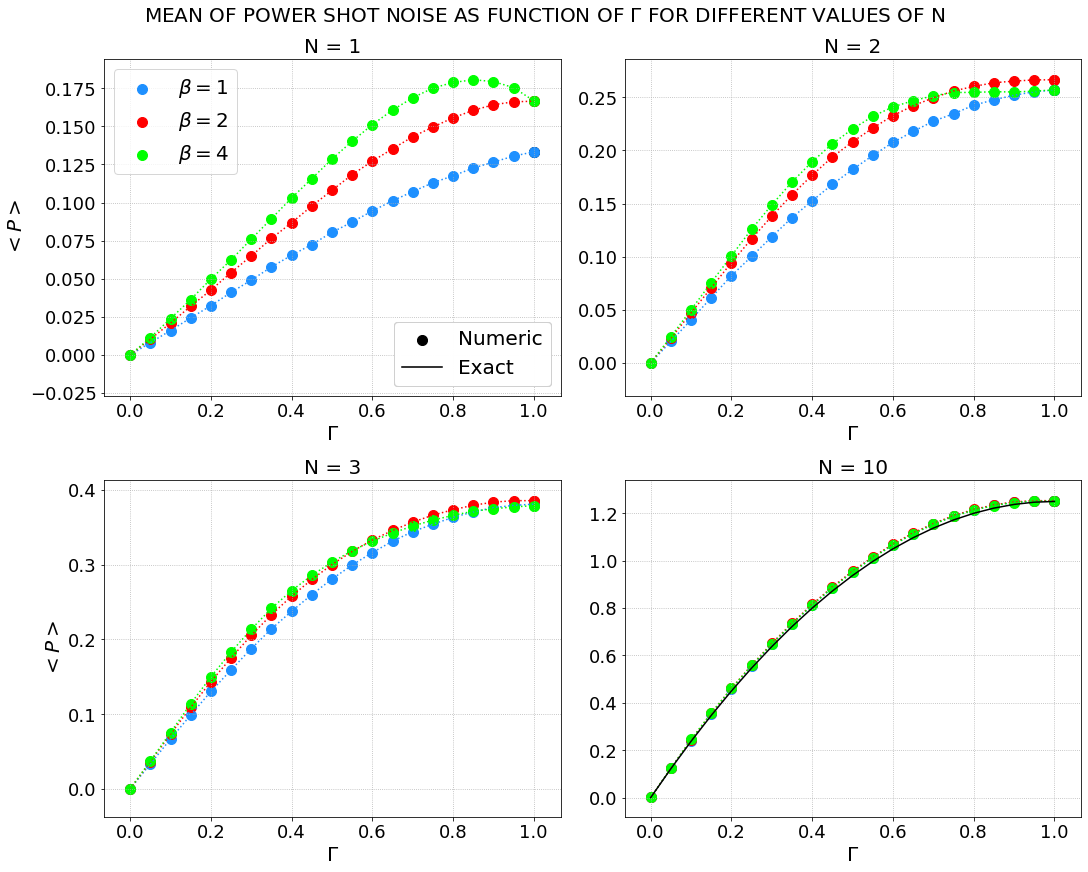

In [18]:
fig, axs = plt.subplots(2,2, figsize = (15,12), constrained_layout = True, facecolor = 'w')

fig.suptitle(r'MEAN OF POWER SHOT NOISE AS FUNCTION OF $\Gamma$ FOR DIFFERENT VALUES OF N', fontsize = 20)

N = 1

for i in range(0,2):
    for j in range(0,2):
        
        if (i == 0) and (j == 0):
            axs[0,0].set_title('N = 1', fontsize = 20)
            axs[0,0].set_ylabel(r'$<P>$', fontsize = 20)
            
            variable_O = meanP_O_1; variable_U = meanP_U_1; variable_S = meanP_S_1
            
        else:
            if (i == 1) and (j == 0):
  
                axs[1,0].set_title('N = 3', fontsize = 20)
                axs[1,0].set_ylabel(r'$<P>$', fontsize = 20)
            
                variable_O = meanP_O_3; variable_U = meanP_U_3; variable_S = meanP_S_3
            
            else:
                if (i == 0) and (j == 1):
                    
                    axs[0,1].set_title('N = 2', fontsize = 20)
                    
                    variable_O = meanP_O_2; variable_U = meanP_U_2; variable_S = meanP_S_2
                    
                else:
                    if (i == 1) and (j == 1):
                        axs[1,1].set_title('N = 10', fontsize = 20)

                        variable_O = meanP_O_10; variable_U = meanP_U_10; variable_S = meanP_S_10 
        
        
        for k in range(0,len(meanG_O_1)):
            axs[i,j].scatter((k)/20, variable_O[k], s = 100, color = 'dodgerblue', alpha = 1)
            axs[i,j].scatter((k)/20, variable_U[k], s = 100, color = 'red', alpha = 1)
            axs[i,j].scatter((k)/20, variable_S[k], s = 100, color = 'lime', alpha = 1)
            
            if k == (len(meanG_O_1)-1):
                Numeric_scatter = axs[i,j].scatter((k)/20, variable_O[k], label = 'Numeric', s = 100, color = 'black', alpha = 1)
                beta_1 = axs[i,j].scatter((k)/20, variable_O[k], label = r'$\beta = 1$', s = 100, color = 'dodgerblue', alpha = 1)
                beta_2 = axs[i,j].scatter((k)/20, variable_U[k], label = r'$\beta = 2$', s = 100, color = 'red', alpha = 1)
                beta_4 = axs[i,j].scatter((k)/20, variable_S[k], label = r'$\beta = 4$', s = 100, color = 'lime', alpha = 1)

        axs[i,j].plot([i/20 for i in range(0,21)], variable_O, color = 'dodgerblue', linestyle = ':')
        axs[i,j].plot([i/20 for i in range(0,21)], variable_U, color = 'red', linestyle = ':')
        axs[i,j].plot([i/20 for i in range(0,21)], variable_S, color = 'lime', linestyle = ':')
        
        if (i == 1 and j == 1):
            N = 10
            Exact_plot, = axs[1,1].plot([i/20 for i in range(0,21)], [(N/8)*(i/20)*(2-(i/20)) for i in range(0,21)], label = 'Exact', color = 'black', linestyle = '-', linewidth = 1.5)

        axs[i,j].grid(linestyle=':')
        first_legend = axs[0,0].legend([Numeric_scatter, Exact_plot], ["Numeric","Exact"], loc = "lower right", fontsize = 20)
        axs[0,0].add_artist(first_legend)
        axs[0,0].legend([beta_1, beta_2, beta_4], [r'$\beta = 1$', r'$\beta = 2$', r'$\beta = 4$'], loc = "upper left", fontsize = 20)


        axs[i,j].set_xlabel(r'$\Gamma$', fontsize = 20)
        axs[i,j].tick_params(axis = 'both', which = 'major', labelsize = 18)
        
        N = N + 1
        

In [19]:
varG_O_1 = np.var(G_O_Gamma_N1, axis = 0)
varG_U_1 = np.var(G_U_Gamma_N1, axis = 0)
varG_S_1 = np.var(G_S_Gamma_N1, axis = 0)

varG_O_2 = np.var(G_O_Gamma_N2, axis = 0)
varG_U_2 = np.var(G_U_Gamma_N2, axis = 0)
varG_S_2 = np.var(G_S_Gamma_N2, axis = 0)

varG_O_3 = np.var(G_O_Gamma_N3, axis = 0)
varG_U_3 = np.var(G_U_Gamma_N3, axis = 0)
varG_S_3 = np.var(G_S_Gamma_N3, axis = 0)

varG_O_10 = np.var(G_O_Gamma_N10, axis = 0)
varG_U_10 = np.var(G_U_Gamma_N10, axis = 0)
varG_S_10 = np.var(G_S_Gamma_N10, axis = 0)

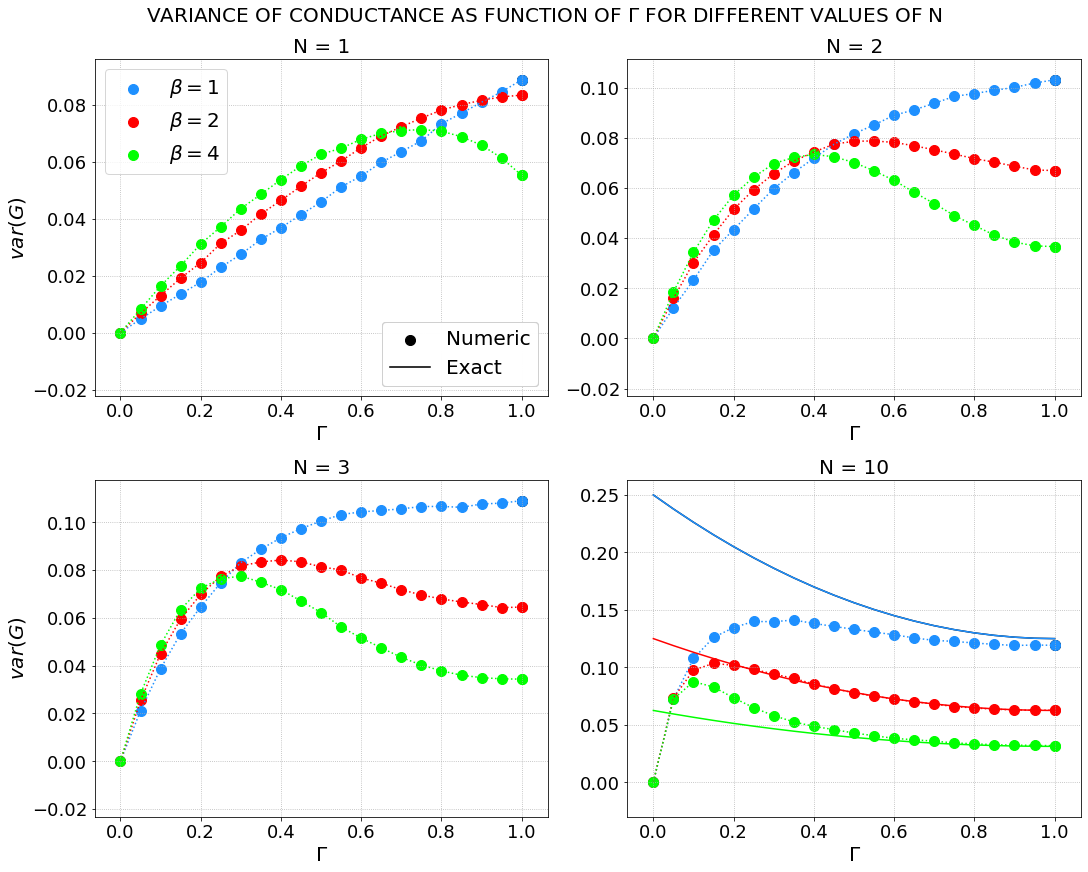

In [20]:
fig, axs = plt.subplots(2,2, figsize = (15,12), constrained_layout = True, facecolor = 'w')

fig.suptitle(r'VARIANCE OF CONDUCTANCE AS FUNCTION OF $\Gamma$ FOR DIFFERENT VALUES OF N', fontsize = 20)

N = 1

for i in range(0,2):
    for j in range(0,2):
        
        if (i == 0) and (j == 0):
            axs[0,0].set_title('N = 1', fontsize = 20)
            axs[0,0].set_ylabel(r'$var(G)$', fontsize = 20)
            
            variable_O = varG_O_1; variable_U = varG_U_1; variable_S = varG_S_1
            
        else:
            if (i == 1) and (j == 0):
  
                axs[1,0].set_title('N = 3', fontsize = 20)
                axs[1,0].set_ylabel(r'$var(G)$', fontsize = 20)
            
                variable_O = varG_O_3; variable_U = varG_U_3; variable_S = varG_S_3
            
            else:
                if (i == 0) and (j == 1):
                    
                    axs[0,1].set_title('N = 2', fontsize = 20)
                    
                    variable_O = varG_O_2; variable_U = varG_U_2; variable_S = varG_S_2
                    
                else:
                    if (i == 1) and (j == 1):
                        axs[1,1].set_title('N = 10', fontsize = 20)

                        variable_O = varG_O_10; variable_U = varG_U_10; variable_S = varG_S_10 
        
        
        for k in range(0,len(meanG_O_1)):
            axs[i,j].scatter((k)/20, variable_O[k], s = 100, color = 'dodgerblue', alpha = 1)
            axs[i,j].scatter((k)/20, variable_U[k], s = 100, color = 'red', alpha = 1)
            axs[i,j].scatter((k)/20, variable_S[k], s = 100, color = 'lime', alpha = 1)

            if k == (len(meanG_O_1)-1):
                Numeric_scatter = axs[i,j].scatter((k)/20, variable_O[k], label = 'Numeric', s = 100, color = 'black', alpha = 1)
                beta_1 = axs[i,j].scatter((k)/20, variable_O[k], label = r'$\beta = 1$', s = 100, color = 'dodgerblue', alpha = 1)
                beta_2 = axs[i,j].scatter((k)/20, variable_U[k], label = r'$\beta = 2$', s = 100, color = 'red', alpha = 1)
                beta_4 = axs[i,j].scatter((k)/20, variable_S[k], label = r'$\beta = 4$', s = 100, color = 'lime', alpha = 1)
  
        axs[i,j].plot([i/20 for i in range(0,21)], variable_O, label = r'$\beta = 1$', color = 'dodgerblue', linestyle = ':')
        axs[i,j].plot([i/20 for i in range(0,21)], variable_U, label = r'$\beta = 2$', color = 'red', linestyle = ':')
        axs[i,j].plot([i/20 for i in range(0,21)], variable_S, label = r'$\beta = 4$', color = 'lime', linestyle = ':')
        
        if (i == 1 and j == 1):
            N = 10
            Exact_plot, = axs[1,1].plot([i/20 for i in range(0,21)], [(1/8)*(1+(1-(i/20))**2) for i in range(0,21)], label = 'Exact', color = 'black', linestyle = '-', linewidth = 1.5)
            axs[1,1].plot([i/20 for i in range(0,21)], [(1/8)*(1+(1-(i/20))**2) for i in range(0,21)], label = 'Exact', color = 'dodgerblue', linestyle = '-', linewidth = 1.5)
            axs[1,1].plot([i/20 for i in range(0,21)], [(1/(8*2))*(1+(1-(i/20))**2) for i in range(0,21)], color = 'red', linestyle = '-', linewidth = 1.5)
            axs[1,1].plot([i/20 for i in range(0,21)], [(1/(8*4))*(1+(1-(i/20))**2) for i in range(0,21)], color = 'lime', linestyle = '-', linewidth = 1.5)
        
        axs[i,j].grid(linestyle=':')
        
        first_legend = axs[0,0].legend([Numeric_scatter, Exact_plot], ["Numeric","Exact"], loc = "lower right", fontsize = 20)
        axs[0,0].add_artist(first_legend)
        axs[0,0].legend([beta_1, beta_2, beta_4], [r'$\beta = 1$', r'$\beta = 2$', r'$\beta = 4$'], loc = "upper left", fontsize = 20)

        axs[i,j].set_xlabel(r'$\Gamma$', fontsize = 20)
        axs[i,j].tick_params(axis = 'both', which = 'major', labelsize = 18)
        
        N = N + 1

In [21]:
varP_O_1 = np.var(P_O_Gamma_N1, axis = 0)
varP_U_1 = np.var(P_U_Gamma_N1, axis = 0)
varP_S_1 = np.var(P_S_Gamma_N1, axis = 0)

varP_O_2 = np.var(P_O_Gamma_N2, axis = 0)
varP_U_2 = np.var(P_U_Gamma_N2, axis = 0)
varP_S_2 = np.var(P_S_Gamma_N2, axis = 0)

varP_O_3 = np.var(P_O_Gamma_N3, axis = 0)
varP_U_3 = np.var(P_U_Gamma_N3, axis = 0)
varP_S_3 = np.var(P_S_Gamma_N3, axis = 0)

varP_O_10 = np.var(P_O_Gamma_N10, axis = 0)
varP_U_10 = np.var(P_U_Gamma_N10, axis = 0)
varP_S_10 = np.var(P_S_Gamma_N10, axis = 0)

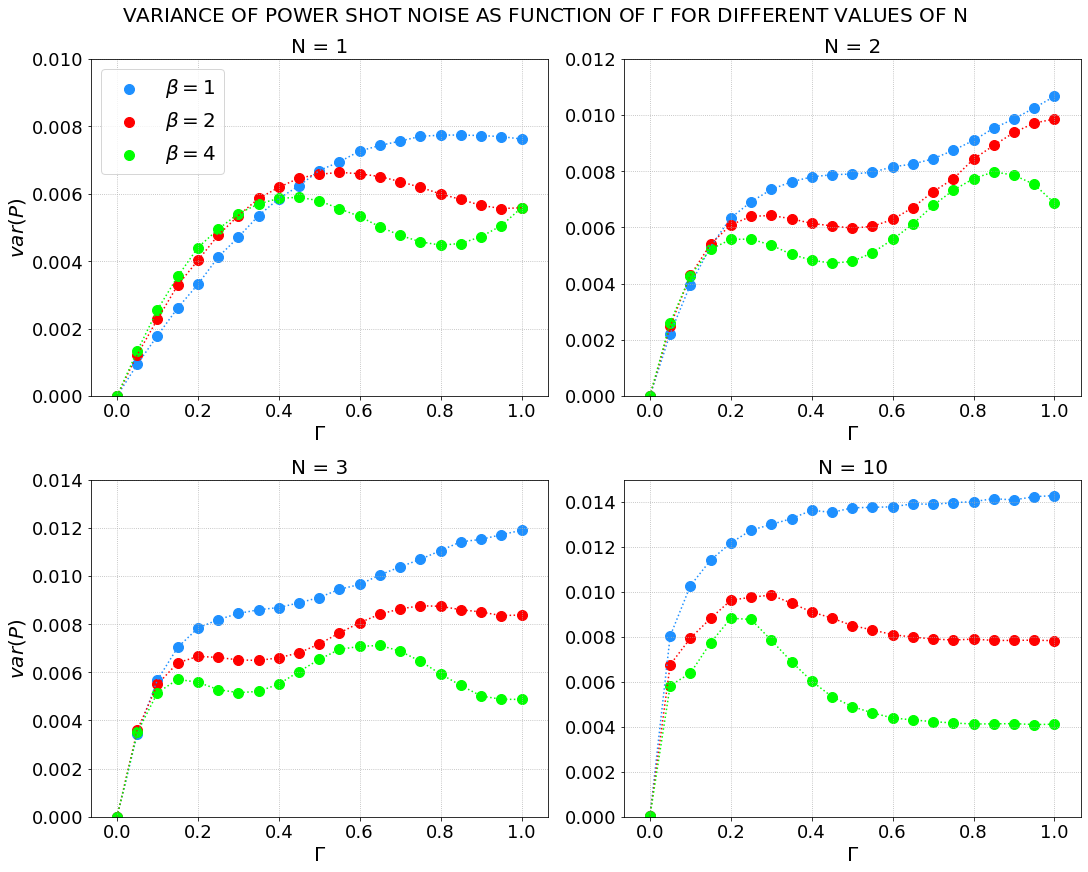

In [22]:
fig, axs = plt.subplots(2,2, figsize = (15,12), constrained_layout = True, facecolor = 'w')

fig.suptitle(r'VARIANCE OF POWER SHOT NOISE AS FUNCTION OF $\Gamma$ FOR DIFFERENT VALUES OF N', fontsize = 20)

for i in range(0,2):
    for j in range(0,2):
        
        if (i == 0) and (j == 0):
            axs[0,0].set_title('N = 1', fontsize = 20)
            axs[0,0].set_ylabel(r'$var(P)$', fontsize = 20)
            axs[0,0].set_ylim([0, 0.01])
            
            variable_O = varP_O_1; variable_U = varP_U_1; variable_S = varP_S_1
            
        else:
            if (i == 1) and (j == 0):
  
                axs[1,0].set_title('N = 3', fontsize = 20)
                axs[1,0].set_ylabel(r'$var(P)$', fontsize = 20)
                axs[1,0].set_ylim([0, 0.014])
            
                variable_O = varP_O_3; variable_U = varP_U_3; variable_S = varP_S_3
            
            else:
                if (i == 0) and (j == 1):
                    
                    axs[0,1].set_title('N = 2', fontsize = 20)
                    axs[0,1].set_ylim([0, 0.012])
                    
                    variable_O = varP_O_2; variable_U = varP_U_2; variable_S = varP_S_2
                    
                else:
                    if (i == 1) and (j == 1):
                        axs[1,1].set_title('N = 10', fontsize = 20)
                        axs[1,1].set_ylim([0, 0.015])

                        variable_O = varP_O_10; variable_U = varP_U_10; variable_S = varP_S_10 
        
        
        for k in range(0,len(meanG_O_1)):
            axs[i,j].scatter((k)/20, variable_O[k], s = 100, color = 'dodgerblue', alpha = 1)
            axs[i,j].scatter((k)/20, variable_U[k], s = 100, color = 'red', alpha = 1)
            axs[i,j].scatter((k)/20, variable_S[k], s = 100, color = 'lime', alpha = 1)

            if k == len(meanG_O_1-1):
                beta_1 = axs[i,j].scatter((k)/20, variable_O[k], s = 100, label = r'$\beta = 1$', color = 'dodgerblue', alpha = 1)
                beta_2 = axs[i,j].scatter((k)/20, variable_U[k], s = 100, label = r'$\beta = 2$', color = 'red', alpha = 1)
                beta_4 = axs[i,j].scatter((k)/20, variable_S[k], s = 100, label = r'$\beta = 4$', color = 'lime', alpha = 1)
            
        axs[i,j].plot([i/20 for i in range(0,21)], variable_O, color = 'dodgerblue', linestyle = ':')
        axs[i,j].plot([i/20 for i in range(0,21)], variable_U, color = 'red', linestyle = ':')
        axs[i,j].plot([i/20 for i in range(0,21)], variable_S, color = 'lime', linestyle = ':')
        
        axs[i,j].grid(linestyle=':')
        axs[0,0].legend([beta_1, beta_2, beta_4], [r'$\beta = 1$', r'$\beta = 2$', r'$\beta = 4$'], loc = "upper left", fontsize = 20)

        axs[i,j].set_xlabel(r'$\Gamma$', fontsize = 20)
        axs[i,j].tick_params(axis = 'both', which = 'major', labelsize = 18)

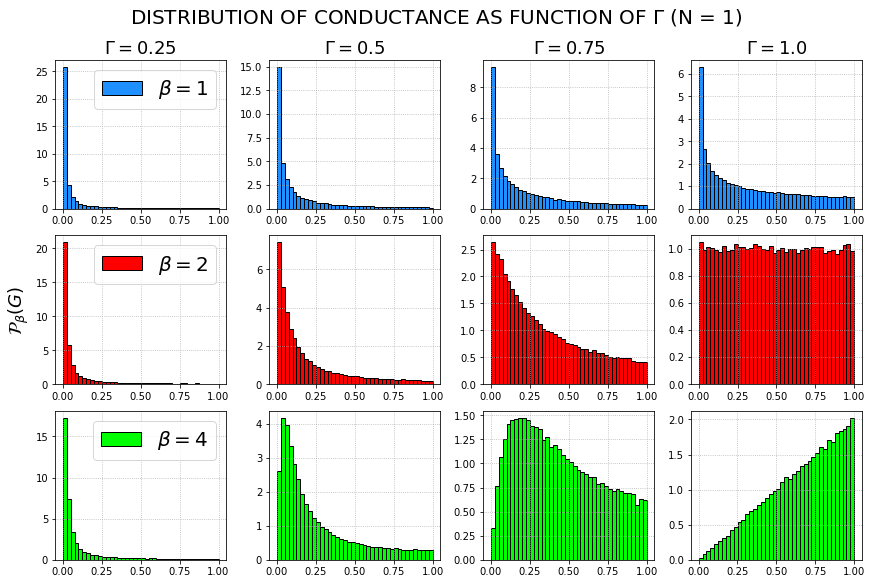

In [23]:
fig, axs = plt.subplots(3,4, figsize = (12,8), constrained_layout = True, facecolor = 'w')

fig.suptitle(r'DISTRIBUTION OF CONDUCTANCE AS FUNCTION OF $\Gamma$ (N = 1)', fontsize = 20)

for j in range(0,4):
    
    gamma_idx = 5*j+5
    
    gamma_value = 0.25*gamma_idx/5
    
    axs[0,j].hist(G_O_Gamma_N1[:,gamma_idx], bins = 40, color='dodgerblue', label = r'$\beta = 1$', alpha=1, density = True, histtype='bar', ec='black');
    axs[1,j].hist(G_U_Gamma_N1[:,gamma_idx], bins = 40, color='red', label = r'$\beta = 2$', alpha=1, density = True, histtype='bar', ec='black');
    axs[2,j].hist(G_S_Gamma_N1[:,gamma_idx], bins = 40, color='lime', label = r'$\beta = 4$', alpha=1, density = True, histtype='bar', ec='black');
    
    axs[0,j].set_title(r'$\Gamma = $'+ str(gamma_value), fontsize = 18)
    
    axs[1,0].set_ylabel(r'$\mathcal{P}_{\beta}(G)$', fontsize = 18)
    
    for i in range(0,3):
        axs[i,0].legend(fontsize = 20)
        axs[i,j].grid(linestyle=':')

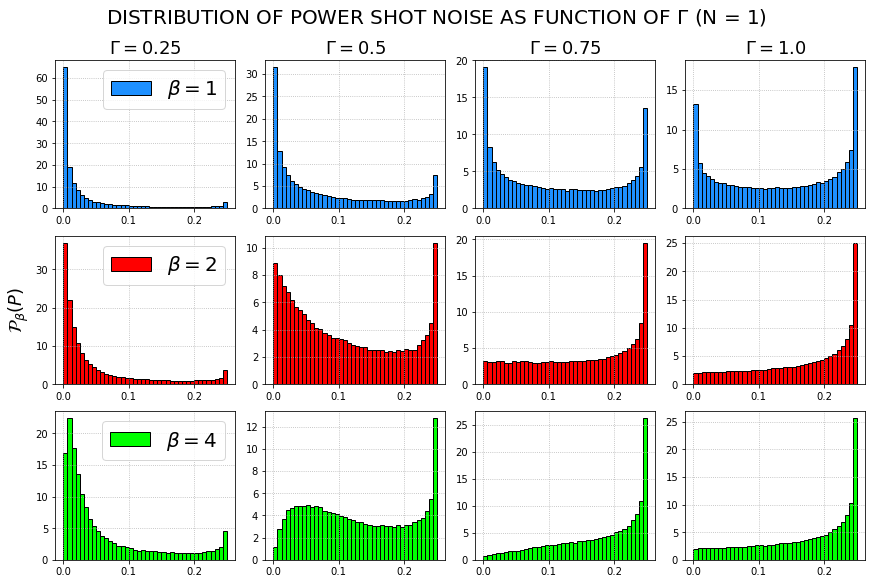

In [24]:
fig, axs = plt.subplots(3,4, figsize = (12,8), constrained_layout = True, facecolor = 'w')

fig.suptitle(r'DISTRIBUTION OF POWER SHOT NOISE AS FUNCTION OF $\Gamma$ (N = 1)', fontsize = 20)

for j in range(0,4):
    
    gamma_idx = 5*j+5
    
    gamma_value = 0.25*gamma_idx/5
    
    axs[0,j].hist(P_O_Gamma_N1[:,gamma_idx], bins = 40, color='dodgerblue', label = r'$\beta = 1$', alpha=1, density = True, histtype='bar', ec='black');
    axs[1,j].hist(P_U_Gamma_N1[:,gamma_idx], bins = 40, color='red', label = r'$\beta = 2$', alpha=1, density = True, histtype='bar', ec='black');
    axs[2,j].hist(P_S_Gamma_N1[:,gamma_idx], bins = 40, color='lime', label = r'$\beta = 4$', alpha=1, density = True, histtype='bar', ec='black');
    
    axs[0,j].set_title(r'$\Gamma = $'+ str(gamma_value), fontsize = 18)
    
    axs[1,0].set_ylabel(r'$\mathcal{P}_{\beta}(P)$', fontsize = 18)
    
    for i in range(0,3):
        axs[i,0].legend(fontsize = 20)
        axs[i,j].grid(linestyle=':')

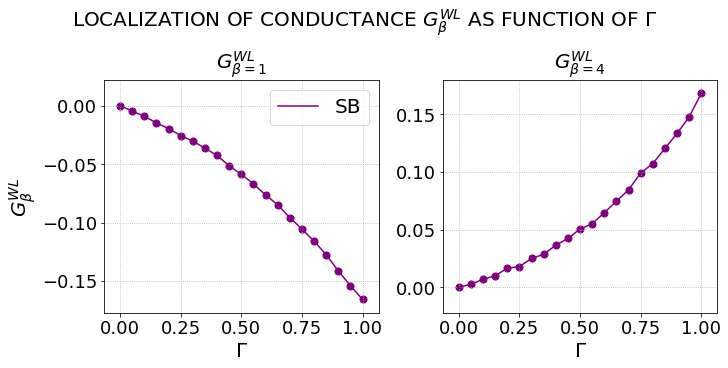

In [25]:
fig, axs = plt.subplots(1,2, figsize = (10,5), constrained_layout = True, facecolor = 'w')

fig.suptitle(r'LOCALIZATION OF CONDUCTANCE $G^{WL}_{\beta}$ AS FUNCTION OF $\Gamma$', fontsize = 20)

for j in range(0,2):
        
    if (j == 0):
        axs[0].set_title(r'$G^{WL}_{\beta = 1}$', fontsize = 20)
        axs[0].set_ylabel(r'$G^{WL}_{\beta}$', fontsize = 20)
            
        variable_1 = meanG_O_1 - meanG_U_1;          
    else:
        if (j == 1):
                    
            axs[1].set_title(r'$G^{WL}_{\beta = 4}$', fontsize = 20)
                    
            variable_1 = meanG_S_1 - meanG_U_1;

        
    for k in range(0,len(meanG_O_1)):
        axs[j].scatter((k)/20, variable_1[k], s = 50, color = 'purple', alpha = 1)
       

    axs[j].plot([i/20 for i in range(0,21)], variable_1, label = 'SB', color = 'purple', linestyle = '-')

    axs[j].grid(linestyle=':')
    axs[0].legend(fontsize = 20)
    
    axs[j].set_xlabel(r'$\Gamma$', fontsize = 20)
    axs[j].tick_params(axis = 'both', which = 'major', labelsize = 18)
        

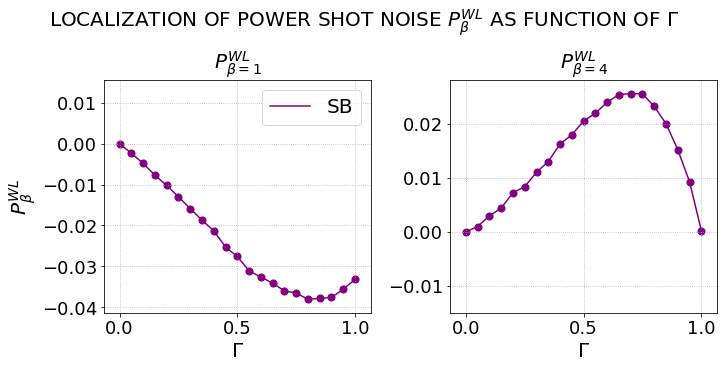

In [26]:
fig, axs = plt.subplots(1,2, figsize = (10,5), constrained_layout = True, facecolor = 'w')

fig.suptitle(r'LOCALIZATION OF POWER SHOT NOISE $P^{WL}_{\beta}$ AS FUNCTION OF $\Gamma$', fontsize = 20)


for j in range(0,2):
        
    if (j == 0):
        axs[0].set_title(r'$P^{WL}_{\beta = 1}$', fontsize = 20)
        axs[0].set_ylabel(r'$P^{WL}_{\beta}$', fontsize = 20)
            
        variable_1 = meanP_O_1 - meanP_U_1;          
    else:
        if (j == 1):
                    
            axs[1].set_title(r'$P^{WL}_{\beta = 4}$', fontsize = 20)
                    
            variable_1 = meanP_S_1 - meanP_U_1;

        
    for k in range(0,len(meanG_O_1)):
        axs[j].scatter((k)/20, variable_1[k], s = 50, color = 'purple', alpha = 1)
       

    axs[j].plot([i/20 for i in range(0,21)], variable_1, label = 'SB', color = 'purple', linestyle = '-')

    axs[j].grid(linestyle=':')
    axs[0].legend(fontsize = 20)

    axs[j].set_xlabel(r'$\Gamma$', fontsize = 20)
    axs[j].tick_params(axis = 'both', which = 'major', labelsize = 18)
        